In [99]:
import requests as r
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import plotly.express as px
%matplotlib inline
import seaborn as sns

In [61]:
html = '<div class="filters-bar__SubFiltersContainer-sc-1r7ee2t-2 eQIAZR"><a href="/group/applications/sub/social"><div title="Social" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 eVtQce">Social</div></a><a href="/group/applications/sub/communication"><div title="Communication" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Communication</div></a><a href="/group/applications/sub/media-video"><div title="Media &amp; Video" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Media &amp; Video</div></a><a href="/group/applications/sub/multimedia"><div title="Multimedia" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Multimedia</div></a><a href="/group/applications/sub/video-players-editors"><div title="Video Players &amp; Editors" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Video Players &amp; Editors</div></a><a href="/group/applications/sub/tools"><div title="Tools" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Tools</div></a><a href="/group/applications/sub/entertainment"><div title="Entertainment" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Entertainment</div></a><a href="/group/applications/sub/business"><div title="Business" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Business</div></a><a href="/group/applications/sub/productivity"><div title="Productivity" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Productivity</div></a><a href="/group/applications/sub/music-audio"><div title="Music &amp; Audio" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Music &amp; Audio</div></a><a href="/group/applications/sub/finance"><div title="Finance" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Finance</div></a><a href="/group/applications/sub/sports"><div title="Sports" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Sports</div></a><a href="/group/applications/sub/travel-local"><div title="Travel &amp; Local" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Travel &amp; Local</div></a><a href="/group/applications/sub/shopping"><div title="Shopping" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Shopping</div></a><a href="/group/applications/sub/lifestyle"><div title="Lifestyle" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Lifestyle</div></a><a href="/group/applications/sub/photography"><div title="Photography" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Photography</div></a><a href="/group/applications/sub/news-magazines"><div title="News &amp; Magazines" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">News &amp; Magazines</div></a><a href="/group/applications/sub/personalization"><div title="Personalization" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Personalization</div></a><a href="/group/applications/sub/education"><div title="Education" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Education</div></a><a href="/group/applications/sub/food-drink"><div title="Food &amp; Drink" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Food &amp; Drink</div></a><a href="/group/applications/sub/maps-navigation"><div title="Maps &amp; Navigation" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Maps &amp; Navigation</div></a><a href="/group/applications/sub/health-fitness"><div title="Health &amp; Fitness" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Health &amp; Fitness</div></a><a href="/group/applications/sub/art-design"><div title="Art &amp; Design" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Art &amp; Design</div></a><a href="/group/applications/sub/parenting"><div title="Parenting" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Parenting</div></a><a href="/group/applications/sub/health"><div title="Health" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Health</div></a><a href="/group/applications/sub/demo"><div title="Demo" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Demo</div></a><a href="/group/applications/sub/transport"><div title="Transport" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Transport</div></a><a href="/group/applications/sub/travel"><div title="Travel" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Travel</div></a><a href="/group/applications/sub/weather"><div title="Weather" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Weather</div></a><a href="/group/applications/sub/comics"><div title="Comics" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Comics</div></a><a href="/group/applications/sub/dating"><div title="Dating" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Dating</div></a><a href="/group/applications/sub/libraries-demo"><div title="Libraries &amp; Demo" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Libraries &amp; Demo</div></a><a href="/group/applications/sub/books-reference"><div title="Books &amp; Reference" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Books &amp; Reference</div></a><a href="/group/applications/sub/auto-vehicles"><div title="Auto &amp; Vehicles" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Auto &amp; Vehicles</div></a><a href="/group/applications/sub/medical"><div title="Medical" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Medical</div></a><a href="/group/applications/sub/beauty"><div title="Beauty" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Beauty</div></a><a href="/group/applications/sub/software-libraries"><div title="Software Libraries" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Software Libraries</div></a><a href="/group/applications/sub/house-home"><div title="House &amp; Home" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">House &amp; Home</div></a><a href="/group/applications/sub/transportation"><div title="Transportation" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Transportation</div></a><a href="/group/applications/sub/reference"><div title="Reference" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Reference</div></a><a href="/group/applications/sub/events"><div title="Events" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Events</div></a><a href="/group/applications/sub/themes"><div title="Themes" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">Themes</div></a><a href="/group/applications/sub/news-weather"><div title="News &amp; Weather" class="base-button__BaseButton-mt450o-0 bubble-button__BubbleButton-sc-5oeja-0 filters-bar__FilterButton-sc-1r7ee2t-3 lpSDQ">News &amp; Weather</div></a></div>'

In [65]:
article_hrefs={}
categories = []
sub_cat=['trending','latest']
game_categories = ['action','strategy','adventure','sports-games','role-playing','puzzle','family','casual']
data = {'App':[], 'Category':[], 'Rating':[], 'Size':[], 'Reviews':[]}

url='https://en.aptoide.com'
url2 = 'https://fr.aptoide.com/group/games'

#resp=r.get(url_c)
soup = BeautifulSoup(html)
#categories = [i.text for i in soup.select('.fXLxnI h2 a')]


hrefs = soup.select('.eQIAZR a')
#print([f"{url}{i.get('href')}" for i in hrefs])
categories = [i.text for i in hrefs]
urls = [i.get('href') for i in hrefs]

for idx, catg in enumerate(categories):
    resp = r.get(f"{url}{urls[idx]}")

    soup = BeautifulSoup(resp.content)
    hrefs = soup.select('.dSFgCQ a')
    article_hrefs[catg] = [i.get('href') for i in hrefs]
    
    for scatg in sub_cat:
        resp = r.get(f"{url}{urls[idx]}/{scatg}")
        soup = BeautifulSoup(resp.content)
        hrefs = soup.select('.dSFgCQ a')
        article_hrefs[catg] += [i.get('href') for i in hrefs]
    
resp = r.get(url2)
soup = BeautifulSoup(resp.content)
game_hrefs = soup.select('.dSFgCQ a')
article_hrefs['Game'] = [i.get('href') for i in game_hrefs]

for catg2 in game_categories:
    resp = r.get(f"{url2}/sub/{catg2.lower()}")
    soup = BeautifulSoup(resp.content)
    game_hrefs = soup.select('.dSFgCQ a')
    article_hrefs['Game'] += [i.get('href') for i in game_hrefs]
    
article_hrefs

{'Social': ['https://twitter.en.aptoide.com/app',
  'https://linkedin-android.en.aptoide.com/app',
  'https://bigo-live.en.aptoide.com/app',
  'https://hago.en.aptoide.com/app',
  'https://musical-ly.en.aptoide.com/app',
  'https://facebook-lite.en.aptoide.com/app',
  'https://snapchat.en.aptoide.com/app',
  'https://telegram.en.aptoide.com/app',
  'https://viber-messenger.en.aptoide.com/app',
  'https://pinterest.en.aptoide.com/app',
  'https://samsung-android-messaging.en.aptoide.com/app',
  'https://facebook-services.en.aptoide.com/app',
  'https://whatsapp-business.en.aptoide.com/app',
  'https://skype.en.aptoide.com/app',
  'https://samsung-android-incallui.en.aptoide.com/app',
  'https://android-autoinstalls-config-motorola-layout.en.aptoide.com/app',
  'https://contacts.en.aptoide.com/app',
  'https://soundcloud-muzik-audio.en.aptoide.com/app',
  'https://instabridge.en.aptoide.com/app',
  'https://google-for-g-suite.en.aptoide.com/app',
  'https://appcake-appcake.en.aptoide.com

In [67]:
len(article_hrefs['Social'])

150

In [68]:
for key,val in article_hrefs.items() : 
    for url in val:
        print(url, ' loading ...')
        resp=r.get(url)
        soup = BeautifulSoup(resp.content)

        data['Category'].append(key)
        try:
            data['App'].append(soup.select('h1')[0].text.strip())
        except:
            data['App'].append(np.nan)
        try:
            data['Rating'].append(soup.select('.bkVlhl span:nth-child(3)')[0].text.strip())
        except:
            data['Rating'].append(np.nan)
        try:
            data['Size'].append(soup.select('.bkVlhl span:nth-child(2)')[0].text.strip())
        except:
            data['Size'].append(np.nan)
        try:
            data['Reviews'].append(sum([int(i.text) for i in soup.select('tbody tr td:nth-child(3) small')]))
        except:
            data['Reviews'].append(np.nan)


https://twitter.en.aptoide.com/app  loading ...
https://linkedin-android.en.aptoide.com/app  loading ...
https://bigo-live.en.aptoide.com/app  loading ...
https://hago.en.aptoide.com/app  loading ...
https://musical-ly.en.aptoide.com/app  loading ...
https://facebook-lite.en.aptoide.com/app  loading ...
https://snapchat.en.aptoide.com/app  loading ...
https://telegram.en.aptoide.com/app  loading ...
https://viber-messenger.en.aptoide.com/app  loading ...
https://pinterest.en.aptoide.com/app  loading ...
https://samsung-android-messaging.en.aptoide.com/app  loading ...
https://facebook-services.en.aptoide.com/app  loading ...
https://whatsapp-business.en.aptoide.com/app  loading ...
https://skype.en.aptoide.com/app  loading ...
https://samsung-android-incallui.en.aptoide.com/app  loading ...
https://android-autoinstalls-config-motorola-layout.en.aptoide.com/app  loading ...
https://contacts.en.aptoide.com/app  loading ...
https://soundcloud-muzik-audio.en.aptoide.com/app  loading ...
ht

In [69]:
df = pd.DataFrame(data)
df

,App,Category,Rating,Size,Reviews
0,Twitter,Social,4.28,19.5 MB,2204
1,LinkedIn,Social,4.01,29.5 MB,179
2,BIGO LIVE,Social,4.3,57 MB,544
3,HAGO,Social,4.18,73.5 MB,257
4,TikTok,Social,4.2,102 MB,4160
...,...,...,...,...,...
6423,Puppy Town - Merge & Win💰,Game,4.03,79.5 MB,37
6424,Bubble Shooter,Game,4.5,20 MB,28
6425,Plaisa,Game,3,42 MB,3
6426,Plants vs. Zombies™ 2 Free,Game,4.39,682.5 MB,5375


# Data Cleaning

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6428 entries, 0 to 6427
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   App       6419 non-null   object
 1   Category  6428 non-null   object
 2   Rating    6418 non-null   object
 3   Size      6418 non-null   object
 4   Reviews   6428 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 251.2+ KB


In [71]:
df.Size.unique()

array(['19.5 MB', '29.5 MB', '57 MB', '73.5 MB', '102 MB', '1.5 MB',
       '96.5 MB', '40.5 MB', '16 MB', '47 MB', '655 kB', '32.5 MB',
       '41 MB', '25 MB', '24 kB', '9.5 MB', '22.5 MB', '33.5 MB', '14 MB',
       '24 MB', '8.5 MB', '9 MB', '26 MB', '23 MB', '1 MB', '34.5 MB',
       '44.5 MB', '10.5 MB', '20.5 MB', '5 MB', '37 MB', '54.5 MB',
       '27 MB', '3.5 MB', '27 kB', '6 MB', '51.5 MB', '37.5 MB',
       '112.5 MB', '14.5 MB', '21.5 MB', '15.5 MB', '3 MB', '68 MB',
       '15 MB', '6.5 MB', '17.5 MB', '12 MB', '7.5 MB', '39 MB',
       '36.5 MB', '65 MB', '62.5 MB', '28 MB', '17 MB', '45.5 MB',
       '13 MB', '534.5 MB', '12.5 MB', '10 MB', '16.5 MB', '61.5 MB',
       '60 MB', '4.5 MB', '26.5 MB', '11.5 MB', '5.5 MB', '8 MB',
       '2.5 MB', '21 MB', '18 MB', '34 MB', '19 MB', '18.5 MB', '41.5 MB',
       '117 MB', '13.5 MB', '99 MB', '72.5 MB', '7 MB', '55 MB',
       '47.5 MB', '94.5 MB', '4 MB', '43.5 MB', '59.5 MB', '99.5 MB',
       '11 MB', '2 MB', '30.5 MB', '2

In [78]:
df[df.Size.str.contains('byte')]

,App,Category,Rating,Size,Reviews
3562,RunKeeper,Health,3.31,0 bytes,13


In [79]:
df.drop(df[df.Size == '0 bytes'].index,inplace=True)

In [81]:
"""
Converting Size of applications to numeric
"""
df[df.Size.str.contains('byte')]
df['Size'] = df['Size'].apply(lambda x: str(x).replace('+',''))

df['Size']=df['Size'].str.replace(' MB','').str.replace(' GB','e+3').str.replace(' kB','e-3').astype('float').round(2)

In [82]:
df.Rating.unique()

array(['4.28', '4.01', '4.3', '4.18', '4.2', '4.26', '4.57', '4.21',
       '4.64', '4.02', '4.32', '3.15', '3.17', '3.86', '4.6', '4.31',
       '4.39', '4.35', '4.17', '3.69', '3.6', '4.33', '3.82', '4.24',
       '3.89', '4.5', '3.24', '3.7', '3.87', '4.75', '3', '1', '4.7',
       '3.71', '5', '4.61', '3.62', '4', '0', '4.66', '4.19', '3.92',
       '4.71', '4.38', '4.36', '4.56', '3.98', '4.23', '4.37', '4.48',
       '4.47', '3.4', '3.53', '4.46', '3.77', '2.67', '4.05', '4.25',
       '3.75', '3.65', '4.12', '4.63', '2.6', '3.95', '3.64', '4.55',
       '4.34', '4.43', '4.73', '3.14', '3.45', '3.85', '3.74', '4.27',
       '4.42', '4.22', '4.04', '3.55', '4.14', '3.78', '4.41', '4.44',
       '2.75', '3.57', '4.06', '3.67', '4.77', '4.03', '3.88', '3.08',
       '3.9', '4.83', '3.09', '3.61', '3.2', '2', '4.13', '4.4', '4.86',
       '3.63', '4.54', '3.33', '4.65', '3.83', '4.45', '3.04', '3.79',
       '3.32', '1.83', '3.43', '2.91', '4.29', '4.15', '3.91', '4.67',
       '2.71

In [83]:
df['Rating']=df['Rating'].astype('float')

In [84]:
df.Category = df.Category.str.replace(" ", "_").str.upper()

In [86]:
df.Category.unique()

array(['SOCIAL', 'COMMUNICATION', 'MEDIA_&_VIDEO', 'MULTIMEDIA',
       'VIDEO_PLAYERS_&_EDITORS', 'TOOLS', 'ENTERTAINMENT', 'BUSINESS',
       'PRODUCTIVITY', 'MUSIC_&_AUDIO', 'FINANCE', 'SPORTS',
       'TRAVEL_&_LOCAL', 'SHOPPING', 'LIFESTYLE', 'PHOTOGRAPHY',
       'NEWS_&_MAGAZINES', 'PERSONALIZATION', 'EDUCATION', 'FOOD_&_DRINK',
       'MAPS_&_NAVIGATION', 'HEALTH_&_FITNESS', 'ART_&_DESIGN',
       'PARENTING', 'HEALTH', 'DEMO', 'TRANSPORT', 'TRAVEL', 'WEATHER',
       'COMICS', 'DATING', 'LIBRARIES_&_DEMO', 'BOOKS_&_REFERENCE',
       'AUTO_&_VEHICLES', 'MEDICAL', 'BEAUTY', 'SOFTWARE_LIBRARIES',
       'HOUSE_&_HOME', 'TRANSPORTATION', 'REFERENCE', 'EVENTS', 'THEMES',
       'NEWS_&_WEATHER', 'GAME'], dtype=object)

In [89]:
df.duplicated().sum()
(df.duplicated().value_counts()/df.shape[0])*100
df.drop_duplicates(inplace=True) 

In [94]:
df.isna().sum()
df.dropna(inplace=True)

App         0
Category    0
Rating      0
Size        0
Reviews     0
dtype: int64

# Export Data in csv

In [95]:
df.to_csv('data/aptoideplaystore.csv', index=False)

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

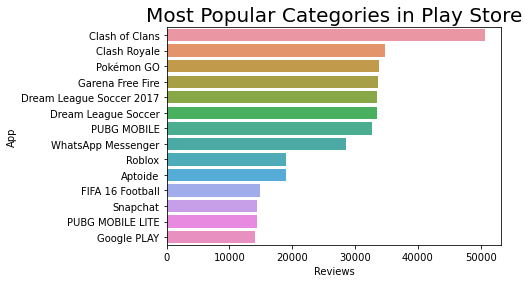

In [100]:
app_reviews = df.sort_values(['Reviews'],ascending = 0 )[:20]
ax = sns.barplot(x = 'Reviews' , y = 'App' , data = app_reviews )
ax.set_xlabel('Reviews')
ax.set_ylabel('App')
ax.set_title("Most Popular Categories in Play Store", size = 20)

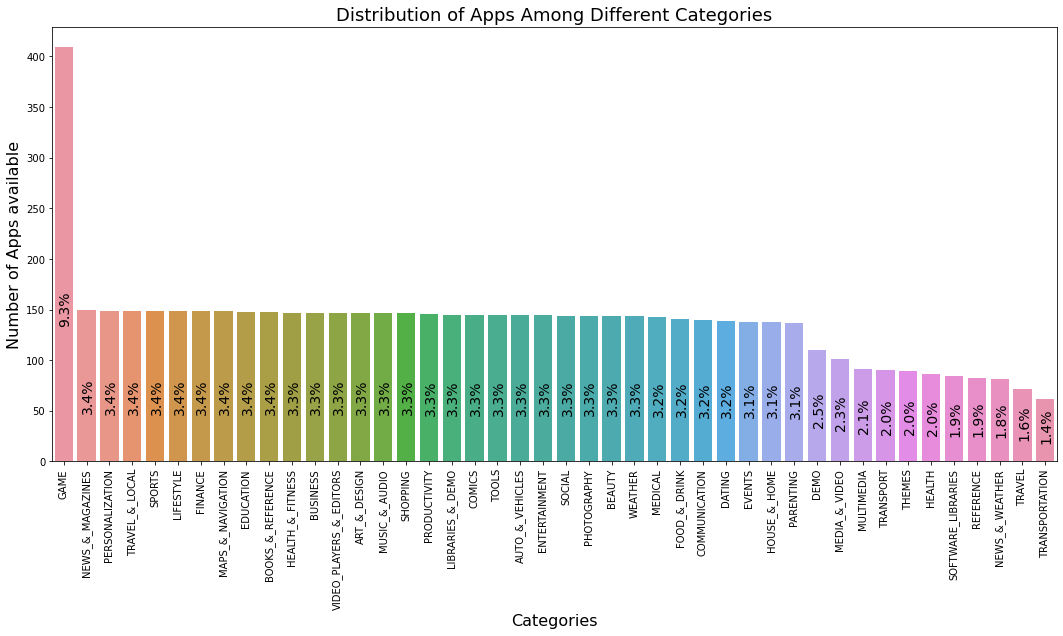

In [101]:
### total number of unique categories
number_of_categories = len(df['Category'].unique())

### Count the number of apps in each 'Category' and sort them in descending order
num_of_apps_in_each_category = df['Category'].value_counts().sort_values(ascending = False)

### Plot of the results
plt.figure(figsize=(18,8))
plot_apps_in_categories = sns.barplot(
         x = num_of_apps_in_each_category.index,  # index = category name
         y = num_of_apps_in_each_category.values, # value = count for each category
                    )

### This makes the plot to look more appealing
plot_apps_in_categories.set_xticklabels(plot_apps_in_categories.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.xlabel(xlabel='Categories', fontsize = 16)
plt.ylabel(ylabel='Number of Apps available', fontsize = 16)
plt.title("Distribution of Apps Among Different Categories", fontsize = 18)

### Let's add percentages to the plot, since this will facilitate interpreation of the findings
def add_percentages(plot, column):
    total = len(column)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(p.get_height()/total)
        x = p.get_x() + p.get_width() / 1.7   # This part defines a horizontal position of the output relative to a respective bar
        y = p.get_y() + p.get_height()/3.0    # This part defines a vertical position of the output relative to a respective bar
        plot.annotate(percentage, (x, y), size = 14,  rotation=90, horizontalalignment='center')
        
add_percentages(plot_apps_in_categories, num_of_apps_in_each_category.values)

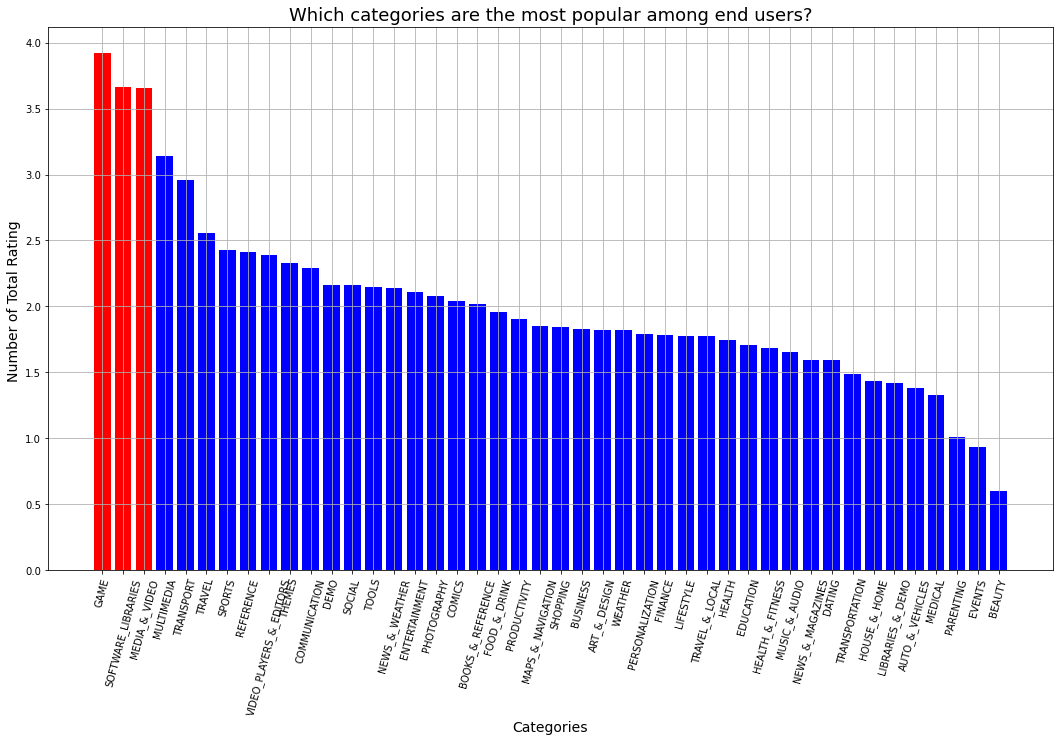

In [110]:
catg_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending = False)
# Now, since the resulting numbers are hard to read, I will express them in millions notation.
catg_rating_per_million = catg_rating

plt.figure(figsize=(18,10))
plt.bar(catg_rating_per_million.index[:3], catg_rating_per_million.values[:3], color='r')
plt.bar(catg_rating_per_million.index[3:], catg_rating_per_million.values[3:], color='b')

plt.xlabel(xlabel='Categories', fontsize = 14)
plt.ylabel(ylabel='Number of Total Rating ', fontsize = 14)
plt.title("Which categories are the most popular among end users?", fontsize = 18)
plt.grid()
plt.xticks(rotation = 75)
plt.show()

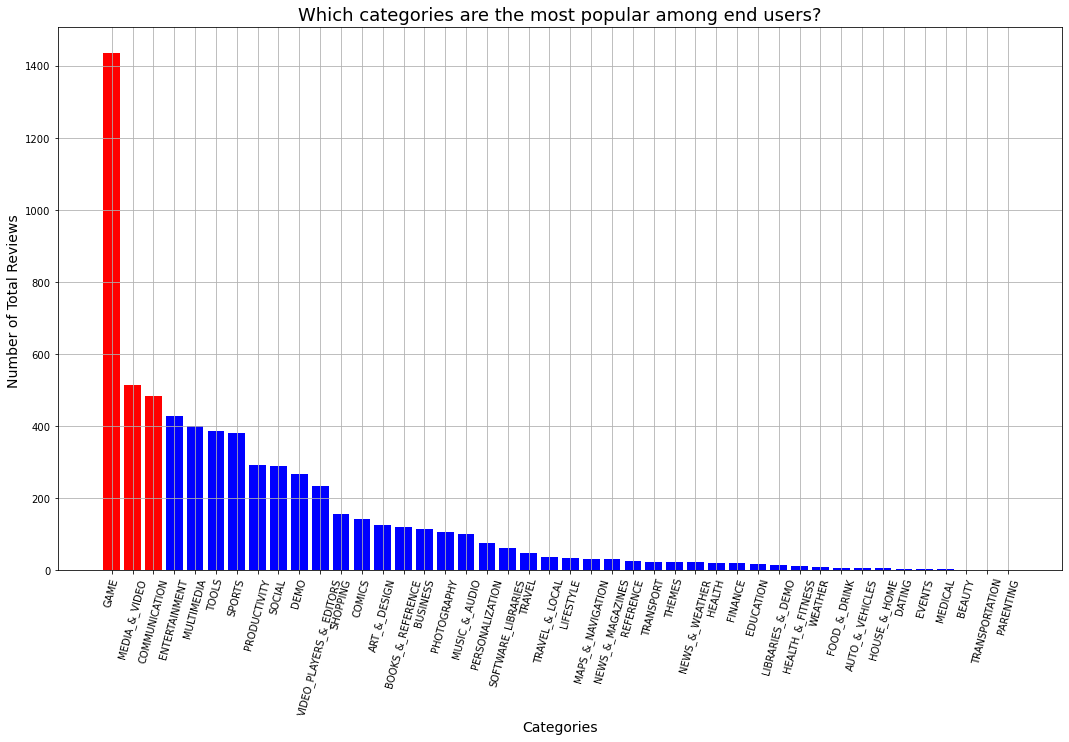

In [109]:
catg_rating = df.groupby('Category')['Reviews'].mean().sort_values(ascending = False)
# Now, since the resulting numbers are hard to read, I will express them in millions notation.
catg_rating_per_million = catg_rating

plt.figure(figsize=(18,10))
plt.bar(catg_rating_per_million.index[:3], catg_rating_per_million.values[:3], color='r')
plt.bar(catg_rating_per_million.index[3:], catg_rating_per_million.values[3:], color='b')

plt.xlabel(xlabel='Categories', fontsize = 14)
plt.ylabel(ylabel='Number of Total Reviews ', fontsize = 14)
plt.title("Which categories are the most popular among end users?", fontsize = 18)
plt.grid()
plt.xticks(rotation = 75)
plt.show()